In [20]:
data_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/cross_prediction_data.csv'

import pandas as pd
df = pd.read_csv(data_path)

In [21]:
df

,Map,Lower,Mean,Upper
0,Convergent,0.09,0.14,0.19
1,DBS,0.05,0.10,0.15
2,Lesion,0.00,0.10,0.20
3,TMS,0.07,0.11,0.16
4,Ferguson 2019,0.08,0.13,0.17
5,Neurosynth,-0.04,0.09,0.22
6,Default,0.06,0.11,0.15


In [24]:
def plot_confidence_intervals(
    df,
    xlabel="Prediction Value",
    out_dir=None,
    primary_color="#8E8E8E",
    secondary_color="#211D1E"
):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os

    # Automatically use first column as label
    df = df.copy()
    label_col = df.columns[0]
    df_sorted = df.sort_values('Mean')

    # Plot setup
    plt.figure(figsize=(10, 6))
    sns.set(style='white', font_scale=1.5)

    # Plot error bars with style
    plt.errorbar(
        x=df_sorted['Mean'],
        y=df_sorted[label_col],
        xerr=[df_sorted['Mean'] - df_sorted['Lower'], df_sorted['Upper'] - df_sorted['Mean']],
        fmt='o',
        ecolor=primary_color,
        elinewidth=4,
        capsize=8,
        capthick=4,
        markeredgecolor=secondary_color,
        markerfacecolor=primary_color,
        markersize=10
    )

    # Light grey dashed line at 0
    plt.axvline(0, linestyle='--', color='#B0B0B0', linewidth=2)

    # Extend x-axis to include 10% of the negative max
    max_val = df[['Lower', 'Upper']].abs().values.max()
    # plt.xlim(-0.1 * max_val, max_val)

    # Style
    sns.despine()
    plt.tick_params(labelsize=20)
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(2)

    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(label_col, fontsize=20)
    plt.title('Cross-Prediction Confidence Intervals', fontsize=20)
    plt.tight_layout()

    # Save
    if out_dir:
        os.makedirs(out_dir, exist_ok=True)
        out_path = os.path.join(out_dir, "confidence_intervals.svg")
        plt.savefig(out_path, format="svg")
        print(f"Saved SVG to: {out_path}")

    plt.show()

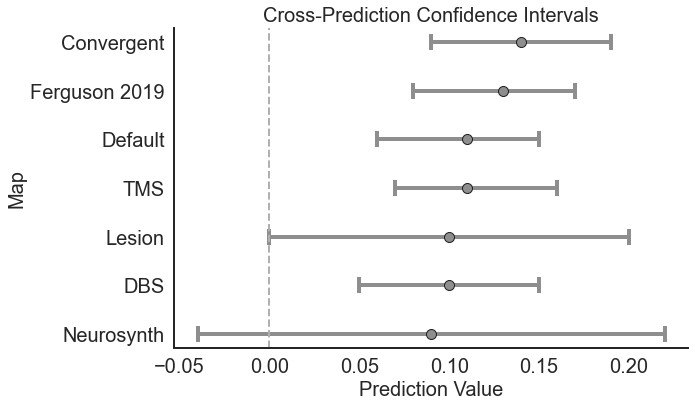

In [25]:
plot_confidence_intervals(
    df,
    xlabel="Prediction Value",
    out_dir=None
)
